<a href="https://colab.research.google.com/github/bhashithadeshara/Brain-tumor-Identification-System/blob/model_CNN_v2/BrainTumorCNNModel_withAug_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd


In [24]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/MSC/Msc Project/DataSet/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Testing/pituitary_tumor/image(11).jpg
/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Testing/pituitary_tumor/image(15).jpg
/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Testing/pituitary_tumor/image(20).jpg
/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Testing/pituitary_tumor/image(1).jpg
/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Testing/pituitary_tumor/image(2).jpg
/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Testing/pituitary_tumor/image(18).jpg
/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Testing/pituitary_tumor/image(13).jpg
/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Testing/pituitary_tumor/image(10).jpg
/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Testing/pituitary_tumor/image(19).jpg
/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Testing/pituitary_tumor/image(28).jpg
/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Testing/pituitary

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [26]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import imgaug.augmenters as iaa

In [27]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [28]:
# Define data augmentation sequence
augmentation = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontally flip 50% of the images
    iaa.Flipud(0.5),  # vertically flip 50% of the images
    iaa.GaussianBlur(sigma=(0.0, 3.0)),  # apply gaussian blur with sigma ranging from 0 to 3
    iaa.Affine(rotate=(-45, 45)),  # rotate images randomly between -45 to 45 degrees
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # add gaussian noise
])

# Function to apply data augmentation to images
def augment_images(images):
    augmented_images = augmentation(images=images)
    return augmented_images

In [29]:
# Function to apply data augmentation to images
def augment_images(images):
    augmented_images = augmentation(images=images)
    return augmented_images

X_train_augmented = []
Y_train_augmented = []

# Apply data augmentation to training images
for i, label in enumerate(Y_train):
    img = X_train[i]
    X_train_augmented.append(img)
    Y_train_augmented.append(label)

    # Augment the image and label
    augmented_img = augment_images([img])[0]
    X_train_augmented.append(augmented_img)
    Y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
Y_train_augmented = np.array(Y_train_augmented)

In [30]:
X_train_augmented,Y_train_augmented = shuffle(X_train_augmented,Y_train_augmented,random_state=101)
X_train_augmented.shape

(6528, 150, 150, 3)

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X_train_augmented,Y_train_augmented,test_size=0.1,random_state=101)
X_train.shape

(5875, 150, 150, 3)

In [32]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train =y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [33]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_13 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [35]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.1)

Epoch 1/25
166/166 [==============================] - 19s 96ms/step - loss: 1.4870 - accuracy: 0.3011 - val_loss: 1.3664 - val_accuracy: 0.2874
Epoch 2/25
166/166 [==============================] - 16s 94ms/step - loss: 1.2039 - accuracy: 0.4541 - val_loss: 1.1353 - val_accuracy: 0.4728
Epoch 3/25
166/166 [==============================] - 16s 95ms/step - loss: 1.0477 - accuracy: 0.5455 - val_loss: 1.3497 - val_accuracy: 0.4456
Epoch 4/25
166/166 [==============================] - 16s 95ms/step - loss: 0.9597 - accuracy: 0.5888 - val_loss: 1.4668 - val_accuracy: 0.4184
Epoch 5/25
166/166 [==============================] - 16s 95ms/step - loss: 0.8837 - accuracy: 0.6276 - val_loss: 1.0084 - val_accuracy: 0.5459
Epoch 6/25
166/166 [==============================] - 16s 94ms/step - loss: 0.8146 - accuracy: 0.6558 - val_loss: 1.1500 - val_accuracy: 0.4847
Epoch 7/25
166/166 [==============================] - 16s 93ms/step - loss: 0.7321 - accuracy: 0.6909 - val_loss: 1.2344 - val_accuracy:

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

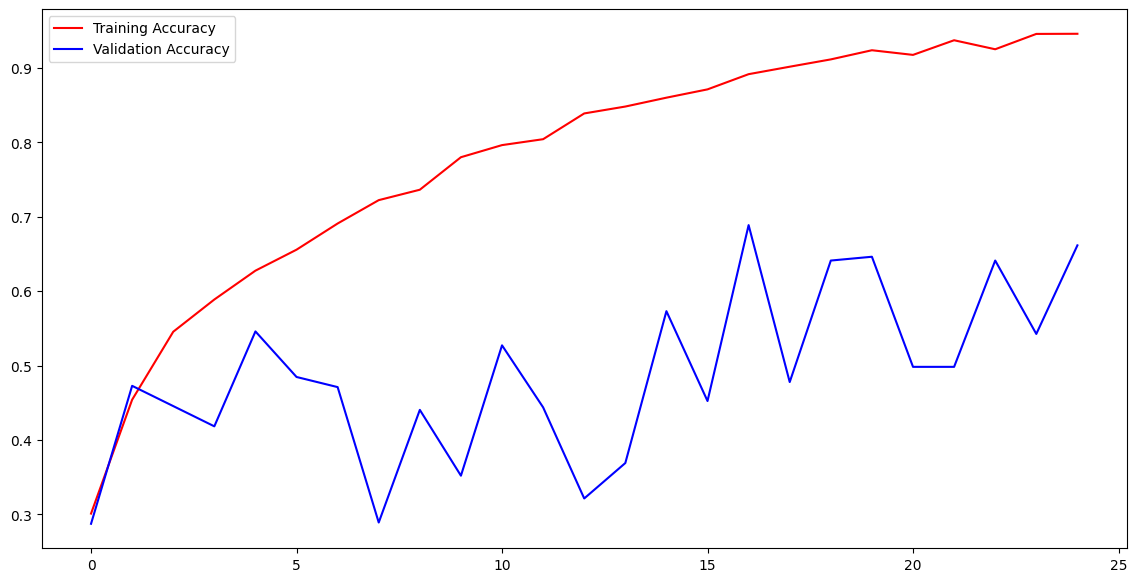

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

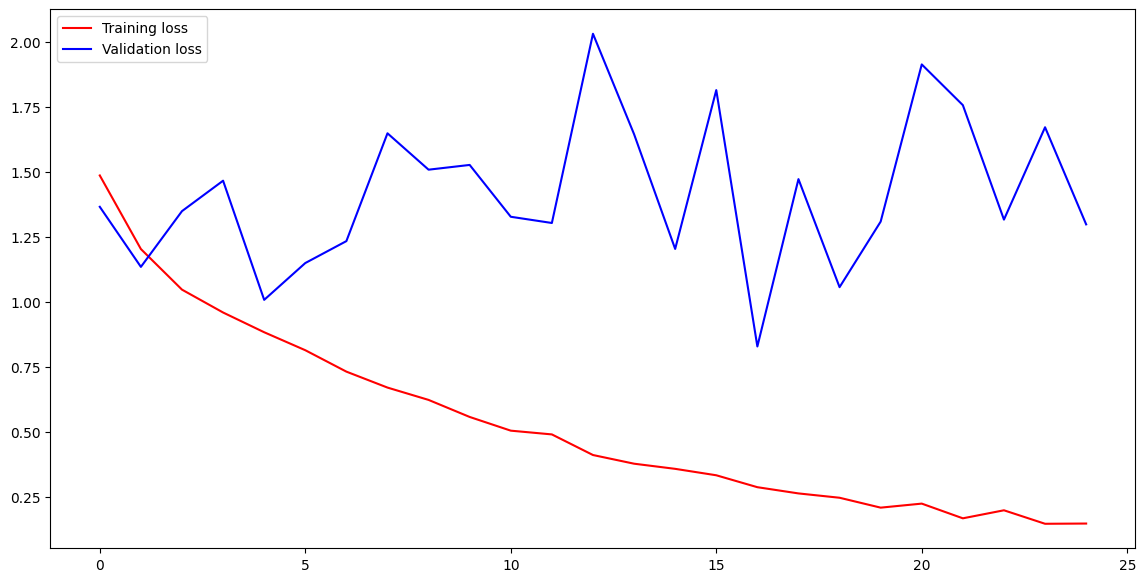

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()


In [40]:
img = cv2.imread('/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [41]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

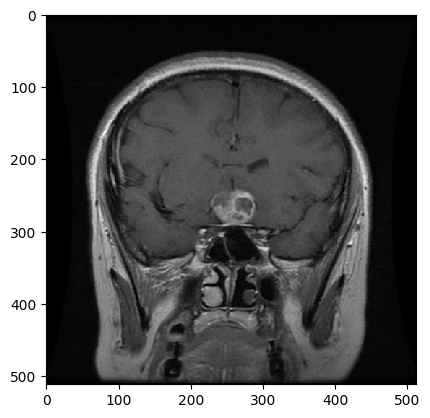

In [42]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/MSC/Msc Project/DataSet/archive/Training/pituitary_tumor/p (108).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [43]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 124ms/step


3

In [44]:
model.save('braintumor.h5')